# SARIMA 

## Importing 

In [26]:
import os

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Getting Data

In [28]:
daily = pd.read_csv("daily-tests-and-daily-new-confirmed-covid-cases (1).csv")
daily

,Entity,Code,Day,new_tests_7day_smoothed,142752-annotations,"Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)"
0,Afghanistan,AFG,2020-02-26,NaN,NaN,1.66667
1,Afghanistan,AFG,2020-02-27,NaN,NaN,1.25000
2,Afghanistan,AFG,2020-02-28,NaN,NaN,1.00000
3,Afghanistan,AFG,2020-02-29,NaN,NaN,0.83333
4,Afghanistan,AFG,2020-03-01,NaN,NaN,0.71429
...,...,...,...,...,...,...
151744,Zimbabwe,ZWE,2020-05-10,NaN,NaN,0.28571
151745,Zimbabwe,ZWE,2020-05-11,NaN,NaN,0.28571
151746,Zimbabwe,ZWE,2020-05-12,NaN,NaN,0.28571
151747,Zimbabwe,ZWE,2021-12-24,NaN,NaN,1881.28571


## Data Preprocessing

In [29]:
india_daily_tests = daily[daily["Entity"]=="India"].copy()

In [30]:
india_daily_tests.head()

,Entity,Code,Day,new_tests_7day_smoothed,142752-annotations,"Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)"
63344,India,IND,2020-03-20,1125.0,samples tested,23.14286
63345,India,IND,2020-03-21,1125.0,samples tested,32.57143
63346,India,IND,2020-03-22,1121.0,samples tested,40.42857
63347,India,IND,2020-03-23,1462.0,samples tested,54.28571
63348,India,IND,2020-03-24,1295.0,samples tested,56.28571


In [31]:
india_daily_tests.drop(["Entity","Code","142752-annotations"],axis=1,inplace=True)
india_daily_tests

,Day,new_tests_7day_smoothed,"Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)"
63344,2020-03-20,1125.0,23.14286
63345,2020-03-21,1125.0,32.57143
63346,2020-03-22,1121.0,40.42857
63347,2020-03-23,1462.0,54.28571
63348,2020-03-24,1295.0,56.28571
...,...,...,...
64033,2020-03-16,NaN,10.85714
64034,2020-03-17,NaN,12.28571
64035,2020-03-18,NaN,13.42857
64036,2020-03-19,NaN,17.28571


In [32]:
india_daily_tests.columns

Index(['Day', 'new_tests_7day_smoothed',
       'Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)'],
      dtype='object')

In [33]:
india_daily_tests.rename(columns={'new_tests_7day_smoothed':'tests',
       'Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)':'confirmed'},inplace=True)
india_daily_tests

,Day,tests,confirmed
63344,2020-03-20,1125.0,23.14286
63345,2020-03-21,1125.0,32.57143
63346,2020-03-22,1121.0,40.42857
63347,2020-03-23,1462.0,54.28571
63348,2020-03-24,1295.0,56.28571
...,...,...,...
64033,2020-03-16,NaN,10.85714
64034,2020-03-17,NaN,12.28571
64035,2020-03-18,NaN,13.42857
64036,2020-03-19,NaN,17.28571


In [34]:
india_daily_tests['Day'] = pd.to_datetime(india_daily_tests['Day'])


In [35]:
india_daily_tests.set_index("Day",inplace=True)
india_daily_tests.sort_index(inplace=True)
india_daily_tests

,tests,confirmed
Day,,
2020-02-01,NaN,0.33333
2020-02-02,NaN,0.50000
2020-02-03,NaN,0.60000
2020-02-04,NaN,0.50000
2020-02-05,NaN,0.42857
...,...,...
2021-12-21,1209104.0,6836.14286
2021-12-22,1215479.0,6767.71429
2021-12-23,1199452.0,6653.85714


In [36]:
india_daily_tests = india_daily_tests.asfreq("D")
india_daily_tests.index

DatetimeIndex(['2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
               '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
               '2020-02-09', '2020-02-10',
               ...
               '2021-12-16', '2021-12-17', '2021-12-18', '2021-12-19',
               '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23',
               '2021-12-24', '2021-12-25'],
              dtype='datetime64[ns]', name='Day', length=694, freq='D')

In [37]:
plt.rcParams['figure.figsize'] = [15,7]

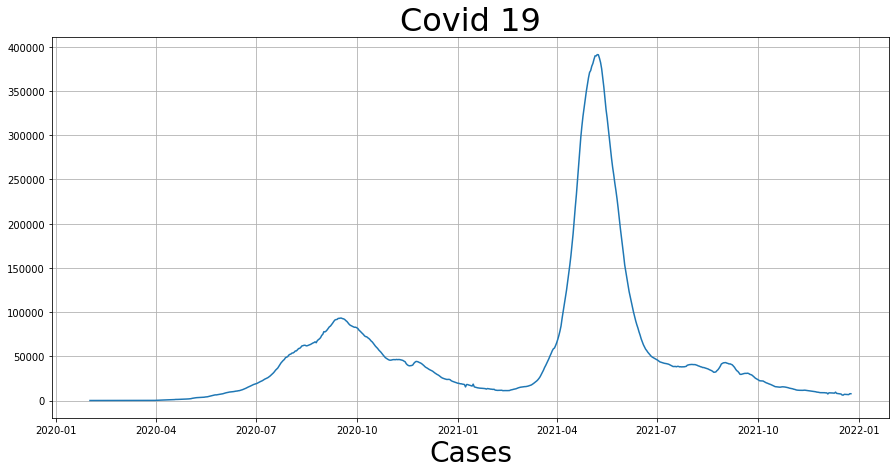

In [38]:
plt.plot(india_daily_tests["confirmed"])
plt.grid(True)
plt.title("Covid 19",size=32)
plt.xlabel("Date",size=28)
plt.xlabel("Cases",size=28)
plt.show()

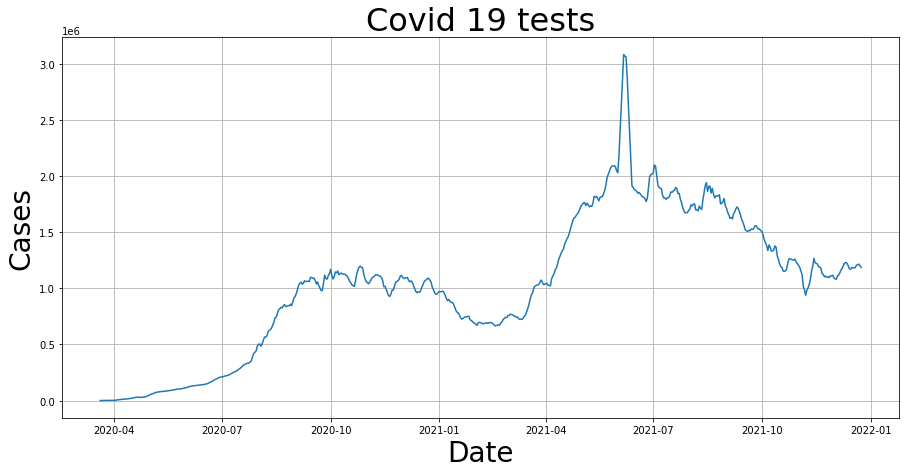

In [39]:
plt.plot(india_daily_tests["tests"])
plt.grid(True)
plt.title("Covid 19 tests",size=32)
plt.xlabel("Date",size=28)
plt.ylabel("Cases",size=28)
plt.show()

In [40]:
deaths = pd.read_csv("deaths.csv")

In [41]:
deaths

,Entity,Code,Day,"Daily new confirmed deaths due to COVID-19 (rolling 7-day average, right-aligned)"
0,Afghanistan,AFG,2020-03-25,0.33333
1,Afghanistan,AFG,2020-03-26,0.50000
2,Afghanistan,AFG,2020-03-27,0.40000
3,Afghanistan,AFG,2020-03-28,0.33333
4,Afghanistan,AFG,2020-03-29,0.57143
...,...,...,...,...
132773,Zimbabwe,ZWE,2021-12-21,11.28571
132774,Zimbabwe,ZWE,2021-12-22,11.85714
132775,Zimbabwe,ZWE,2021-12-23,13.71429
132776,Zimbabwe,ZWE,2021-12-24,13.14286


In [42]:
india_deaths = deaths[deaths["Entity"] == "India"].copy()
india_deaths

,Entity,Code,Day,"Daily new confirmed deaths due to COVID-19 (rolling 7-day average, right-aligned)"
56534,India,IND,2020-03-13,0.66667
56535,India,IND,2020-03-14,0.50000
56536,India,IND,2020-03-15,0.40000
56537,India,IND,2020-03-16,0.33333
56538,India,IND,2020-03-17,0.42857
...,...,...,...,...
57182,India,IND,2021-12-21,312.85714
57183,India,IND,2021-12-22,325.85714
57184,India,IND,2021-12-23,323.42857
57185,India,IND,2021-12-24,378.71429


In [43]:
india_deaths.drop(["Entity","Code"],axis=1,inplace=True)
india_deaths

,Day,"Daily new confirmed deaths due to COVID-19 (rolling 7-day average, right-aligned)"
56534,2020-03-13,0.66667
56535,2020-03-14,0.50000
56536,2020-03-15,0.40000
56537,2020-03-16,0.33333
56538,2020-03-17,0.42857
...,...,...
57182,2021-12-21,312.85714
57183,2021-12-22,325.85714
57184,2021-12-23,323.42857
57185,2021-12-24,378.71429


In [44]:
india_deaths.columns

Index(['Day', 'Daily new confirmed deaths due to COVID-19 (rolling 7-day average, right-aligned)'], dtype='object')

In [45]:
india_deaths.rename(columns = {'Daily new confirmed deaths due to COVID-19 (rolling 7-day average, right-aligned)':'deaths'},inplace=True)

In [46]:
india_deaths

,Day,deaths
56534,2020-03-13,0.66667
56535,2020-03-14,0.50000
56536,2020-03-15,0.40000
56537,2020-03-16,0.33333
56538,2020-03-17,0.42857
...,...,...
57182,2021-12-21,312.85714
57183,2021-12-22,325.85714
57184,2021-12-23,323.42857
57185,2021-12-24,378.71429


In [47]:
india_deaths['Day'] = pd.to_datetime(india_deaths['Day'])
india_deaths.set_index("Day",inplace=True)
india_deaths.sort_index(inplace=True)
india_deaths = india_deaths.asfreq("D")
india_deaths

,deaths
Day,
2020-03-13,0.66667
2020-03-14,0.50000
2020-03-15,0.40000
2020-03-16,0.33333
2020-03-17,0.42857
...,...
2021-12-21,312.85714
2021-12-22,325.85714
2021-12-23,323.42857


In [48]:
india = pd.merge(india_daily_tests,india_deaths,how="outer",on="Day")
india

,tests,confirmed,deaths
Day,,,
2020-02-01,NaN,0.33333,NaN
2020-02-02,NaN,0.50000,NaN
2020-02-03,NaN,0.60000,NaN
2020-02-04,NaN,0.50000,NaN
2020-02-05,NaN,0.42857,NaN
...,...,...,...
2021-12-21,1209104.0,6836.14286,312.85714
2021-12-22,1215479.0,6767.71429,325.85714
2021-12-23,1199452.0,6653.85714,323.42857


In [49]:
corr = india.corr()
corr

,tests,confirmed,deaths
tests,1.000000,0.468226,0.576934
confirmed,0.468226,1.000000,0.874305
deaths,0.576934,0.874305,1.000000


In [50]:
import seaborn as sns

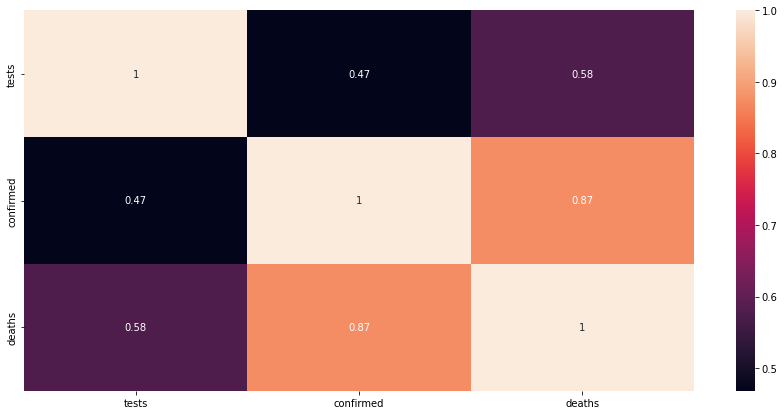

In [51]:
sns.heatmap(corr,annot=True)
plt.show()

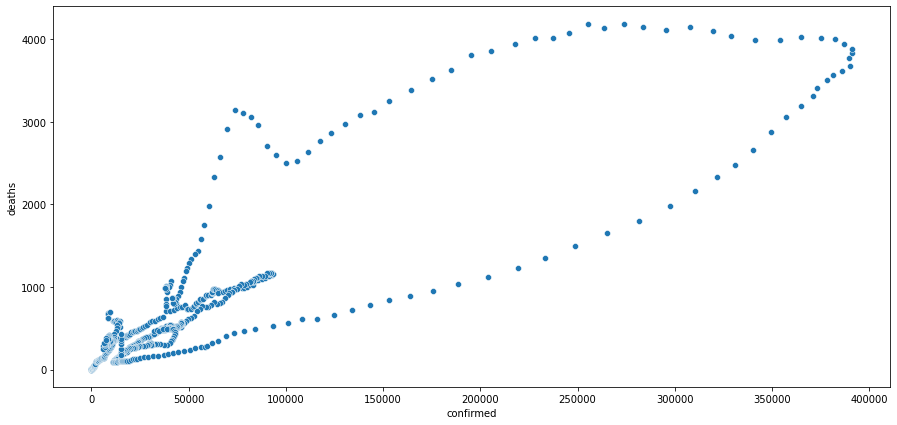

In [52]:
sns.scatterplot(data=india,x="confirmed",y="deaths")
plt.show()

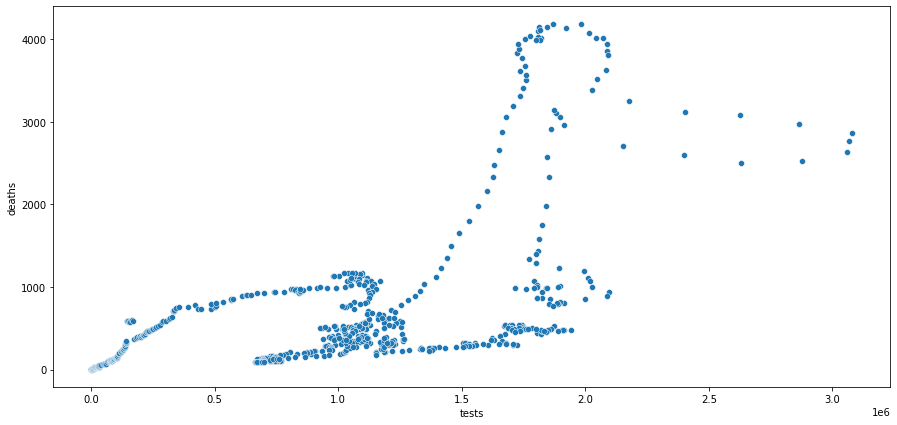

In [53]:
sns.scatterplot(data=india,x="tests",y="deaths")
plt.show()

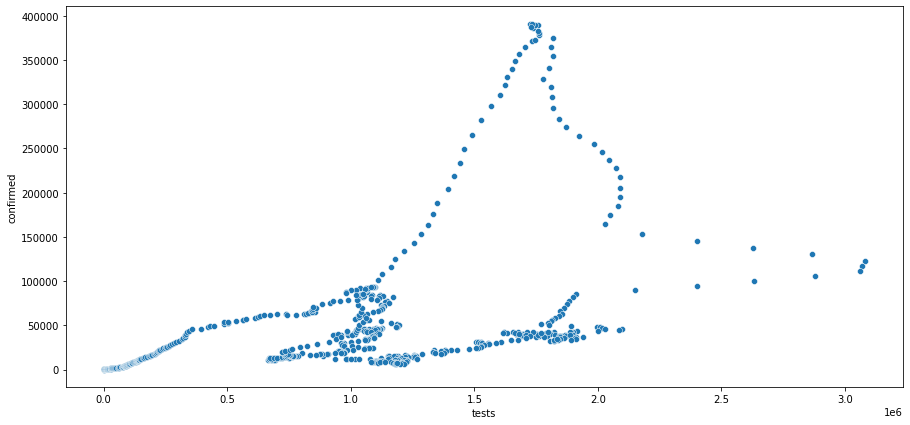

In [54]:
sns.scatterplot(data=india,x="tests",y="confirmed")
plt.show()

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import itertools
import warnings
from tqdm import tqdm_notebook
import os
warnings.filterwarnings("ignore")

## Modeling

In [56]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats.distributions import chi2
from math import sqrt
from itertools import product

In [57]:
data = india.copy()

In [58]:
data.dropna(inplace=True)

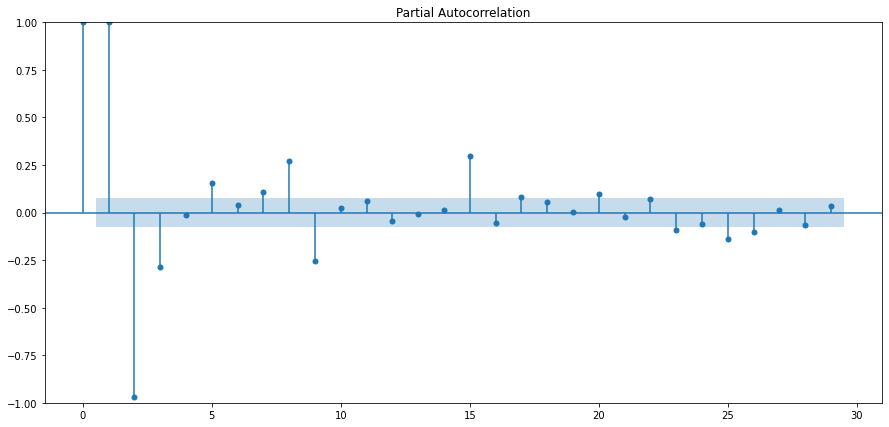

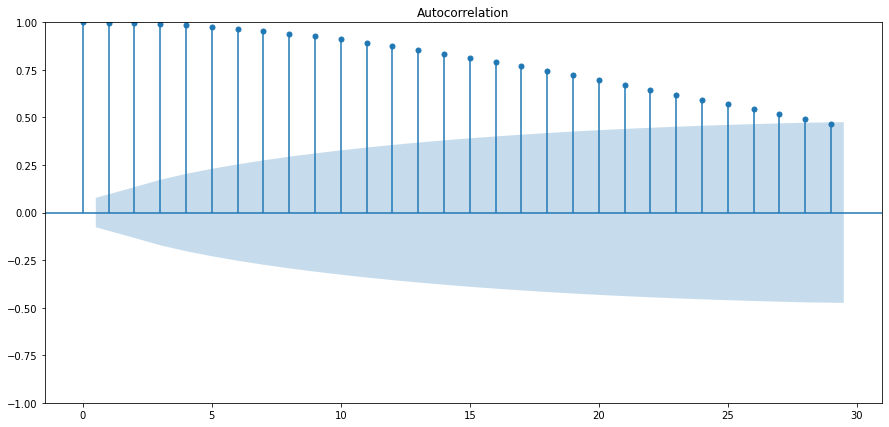

In [59]:
plt.rcParams['figure.figsize'] = [15,7]
plot_pacf(data['confirmed'],method=('ols'));
plot_acf(data['confirmed']);

In [60]:
def test_stationary(series,col_name):
        print(f'Result of Dickey-Fuller Test : {col_name}')
        dftest = adfuller(series,autolag='AIC')
        dfoutput = pd.Series(dftest[0:4],index=["Test Statistic",'p-value','No Lags Used','Number of Observation used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)
        if dftest[1]<=0.05:
            print("Conclusion:======>")
            print("Reject the null hypothesis")
            print("Data is stationary")
        else:
            print("Conclusion:======>")
            print("Fail to reject the null hypothesis")
            print("Data is non-stationary")

In [61]:
test_stationary(data['confirmed'],"Daily Confirmed")

Result of Dickey-Fuller Test : Daily Confirmed
Test Statistic                 -2.107134
p-value                         0.241656
No Lags Used                   19.000000
Number of Observation used    625.000000
Critical Value (1%)            -3.440856
Critical Value (5%)            -2.866175
Critical Value (10%)           -2.569239
dtype: float64
Conclusion:======>
Fail to reject the null hypothesis
Data is non-stationary


In [62]:
df = pd.DataFrame()
df['daily'] = data['confirmed']
df['log_daily'] = np.log(data['confirmed'])
df['log_daily_diff'] = df['log_daily'].diff()

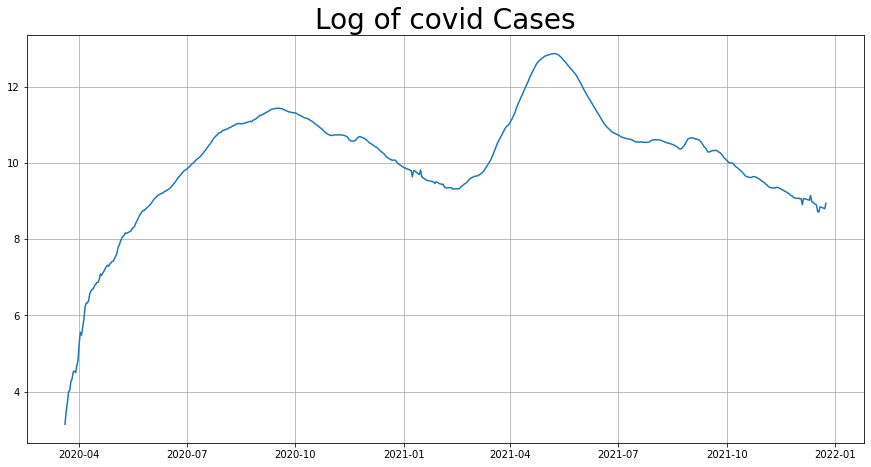

In [63]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(df.log_daily)
plt.title("Log of covid Cases",size = 28)
plt.grid(True)
plt.show()

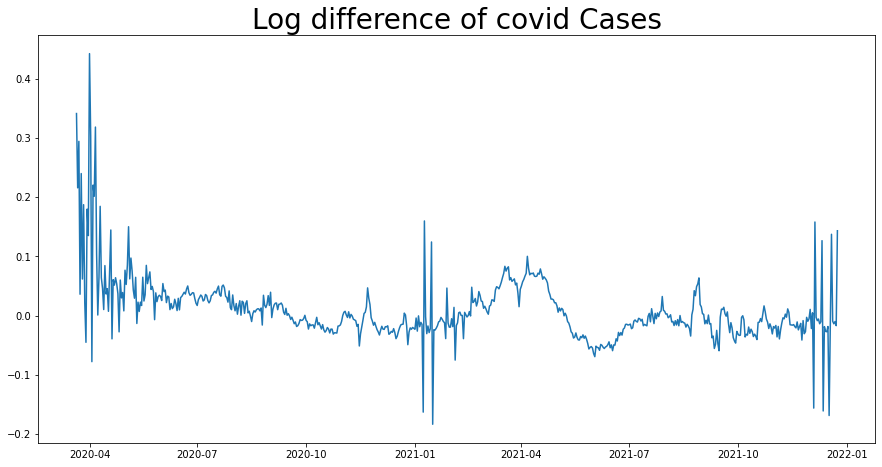

In [64]:
plt.figure(figsize=[15, 7.5])
plt.plot(df.log_daily_diff)
plt.title("Log difference of covid Cases",size = 28)
plt.show()

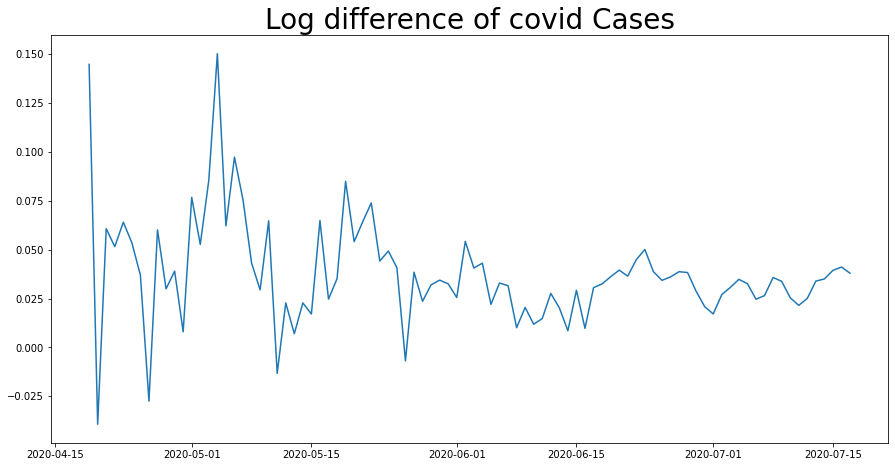

In [65]:
plt.figure(figsize=[15, 7.5])
plt.plot(df.log_daily_diff.iloc[30:120])
plt.title("Log difference of covid Cases",size = 28)
plt.show()

In [66]:
print(f'no of NaN values in the dataframe : {df.isna().sum()}')
print(f'no of Inf values in the dataframe : {np.isinf(df).values.sum()}')

no of NaN values in the dataframe : daily             0
log_daily         0
log_daily_diff    1
dtype: int64
no of Inf values in the dataframe : 0


In [67]:
df.dropna(inplace=True)

In [68]:
print(f'no of NaN values in the dataframe : {df.isna().sum()}')
print(f'no of Inf values in the dataframe : {np.isinf(df).values.sum()}')

no of NaN values in the dataframe : daily             0
log_daily         0
log_daily_diff    0
dtype: int64
no of Inf values in the dataframe : 0


In [69]:
test_stationary(df['log_daily_diff'],"log_daily_diff")

Result of Dickey-Fuller Test : log_daily_diff
Test Statistic                 -3.709480
p-value                         0.003982
No Lags Used                   20.000000
Number of Observation used    623.000000
Critical Value (1%)            -3.440890
Critical Value (5%)            -2.866190
Critical Value (10%)           -2.569247
dtype: float64
Conclusion:======>
Reject the null hypothesis
Data is stationary


In [70]:
# Seasonal differencing
df['seasonal_diff'] = df['log_daily_diff'].diff(7)
df['seasonal_diff'].head(10)

Day
2020-03-21         NaN
2020-03-22         NaN
2020-03-23         NaN
2020-03-24         NaN
2020-03-25         NaN
2020-03-26         NaN
2020-03-27         NaN
2020-03-28   -0.320210
2020-03-29   -0.261245
2020-03-30   -0.114528
Name: seasonal_diff, dtype: float64

In [71]:
df.dropna(inplace=True)
df.head(10)

,daily,log_daily,log_daily_diff,seasonal_diff
Day,,,,
2020-03-28,93.85714,4.541774,0.021539,-0.320210
2020-03-29,89.71429,4.496630,-0.045144,-0.261245
2020-03-30,107.42857,4.676826,0.180196,-0.114528
2020-03-31,123.00000,4.812184,0.135358,0.099179
2020-04-01,191.57143,5.255261,0.443076,0.202821
2020-04-02,259.42857,5.558481,0.303221,0.241305
2020-04-03,240.00000,5.480639,-0.077842,-0.265466
2020-04-04,299.28571,5.701399,0.220760,0.199220
2020-04-05,366.28571,5.903414,0.202015,0.247159


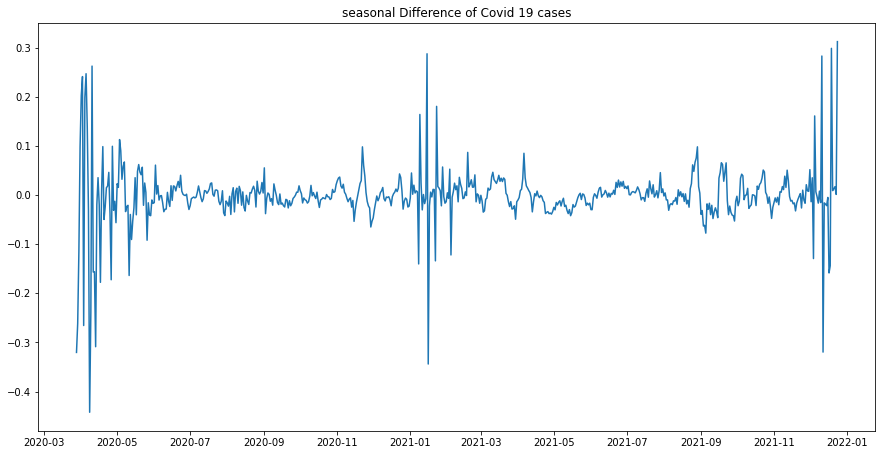

In [72]:
plt.figure(figsize=[15, 7.5]);
plt.plot(df['seasonal_diff'])
plt.title("seasonal Difference of Covid 19 cases")
plt.show()

In [73]:
test_stationary(df['seasonal_diff'],"Daily Confirmed")

Result of Dickey-Fuller Test : Daily Confirmed
Test Statistic               -7.103498e+00
p-value                       4.110003e-10
No Lags Used                  2.000000e+01
Number of Observation used    6.160000e+02
Critical Value (1%)          -3.441010e+00
Critical Value (5%)          -2.866243e+00
Critical Value (10%)         -2.569275e+00
dtype: float64
Conclusion:======>
Reject the null hypothesis
Data is stationary


In [74]:
train,test = df['seasonal_diff'].iloc[:-30],df['seasonal_diff'].iloc[-30:]

In [75]:
test_stationary(train,"train")

Result of Dickey-Fuller Test : train
Test Statistic               -6.036556e+00
p-value                       1.377634e-07
No Lags Used                  1.800000e+01
Number of Observation used    5.880000e+02
Critical Value (1%)          -3.441520e+00
Critical Value (5%)          -2.866468e+00
Critical Value (10%)         -2.569394e+00
dtype: float64
Conclusion:======>
Reject the null hypothesis
Data is stationary


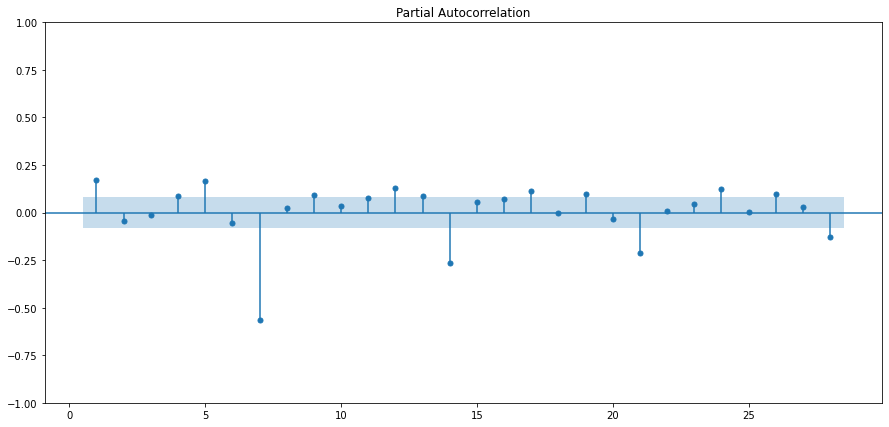

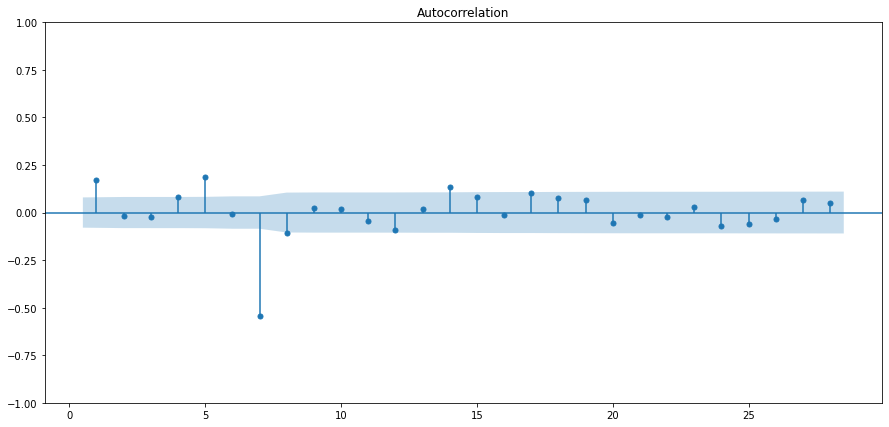

In [76]:
plt.rcParams['figure.figsize'] = [15,7]
plot_pacf(train,zero=False,method=("ols"));
plot_acf(train,zero=False);

In [77]:
import multiprocessing

In [78]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [79]:
p = [0,1,2,3,4,5,6,7]
d = 1
q = [0,1,2,3,4,5,6,7]
P = [0,1,2,3]
D = 1
Q = [0,1,2,3]
s = 7
param = product(p, q, P, Q)
param_list = list(param)
print(len(param_list))

1024


In [109]:
result_df = optimize_SARIMA(param_list, 1, 1, 7, train)
result_df

  0%|          | 0/1024 [00:00<?, ?it/s]

In [80]:
best_model = SARIMAX(df['seasonal_diff'], order=(4, 1, 1), seasonal_order=(0, 1, 3, 7)).fit(dis=-1)
print(best_model.summary())

                                         SARIMAX Results                                         
Dep. Variable:                             seasonal_diff   No. Observations:                  637
Model:             SARIMAX(4, 1, 1)x(0, 1, [1, 2, 3], 7)   Log Likelihood                1189.678
Date:                                   Thu, 30 Dec 2021   AIC                          -2361.356
Time:                                           20:31:52   BIC                          -2321.359
Sample:                                       03-28-2020   HQIC                         -2345.819
                                            - 12-24-2021                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0249      0.065    -15.659      0.000    

In [ ]:
result_df.to_csv("SARIMA_parameters.csv")

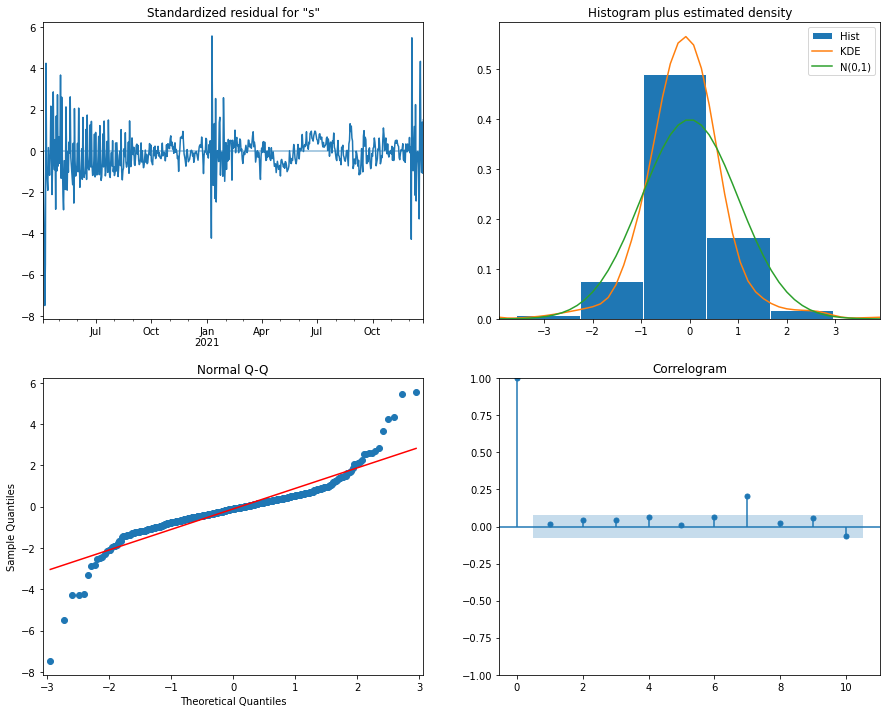

In [81]:
best_model.plot_diagnostics(figsize=(15,12));

In [82]:
test

Day
2021-11-25    0.010090
2021-11-26   -0.009878
2021-11-27   -0.016569
2021-11-28    0.021217
2021-11-29    0.008628
2021-11-30    0.007750
2021-12-01    0.051857
2021-12-02   -0.013428
2021-12-03    0.035325
2021-12-04   -0.129150
2021-12-05    0.161203
2021-12-06    0.006786
2021-12-07   -0.003162
2021-12-08   -0.016311
2021-12-09    0.008127
2021-12-10   -0.015178
2021-12-11    0.283158
2021-12-12   -0.319565
2021-12-13   -0.015839
2021-12-14   -0.018142
2021-12-15   -0.021444
2021-12-16   -0.004678
2021-12-17   -0.158462
2021-12-18   -0.143790
2021-12-19    0.298795
2021-12-20    0.009214
2021-12-21    0.012840
2021-12-22    0.017163
2021-12-23    0.001440
2021-12-24    0.312461
Name: seasonal_diff, dtype: float64

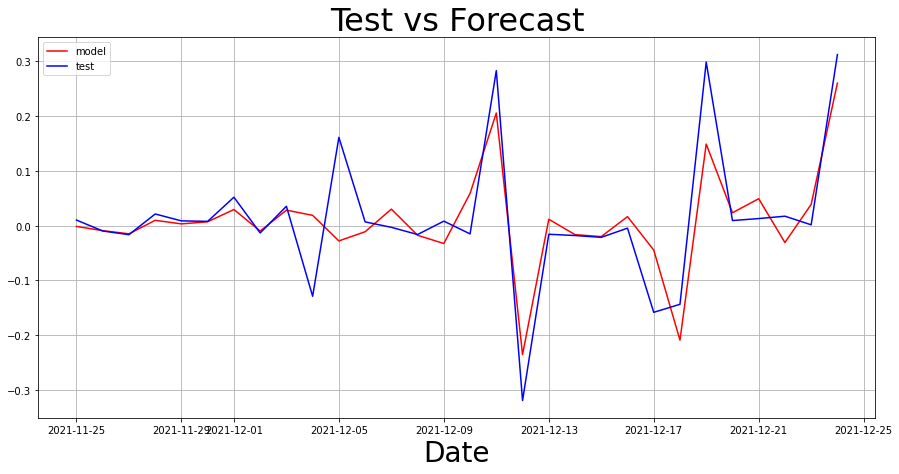

In [87]:
forecast = best_model.predict(start = pd.to_datetime("2021-11-25"),end=pd.to_datetime("2021-12-24"))
plt.figure(figsize=(15,7))
plt.plot(forecast,color='r',label="model")
plt.plot(test,label="test",color='b')
plt.grid(True)
plt.title("Test vs Forecast",size=32)
plt.xlabel("Date",size=28)
plt.legend()
plt.show()

In [88]:
import pickle

In [89]:
best_model.save("model.pkl")

In [90]:
from statsmodels.tsa.statespace.sarimax import SARIMAXResults

## SARIMAX

In [91]:
model = SARIMAXResults.load("model.pkl")

In [92]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                         
=================================================================================================
Dep. Variable:                             seasonal_diff   No. Observations:                  637
Model:             SARIMAX(4, 1, 1)x(0, 1, [1, 2, 3], 7)   Log Likelihood                1189.678
Date:                                   Thu, 30 Dec 2021   AIC                          -2361.356
Time:                                           20:34:11   BIC                          -2321.359
Sample:                                       03-28-2020   HQIC                         -2345.819
                                            - 12-24-2021                                         
Covariance Type:                                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0249      0.065    -15.659      0.000      -1.153      -0.897
ar.L2         -0.6836      0.061    -11.159      0.000      -0.804      -0.564
ar.L3         -0.5098      0.040    -12.652      0.000      -0.589      -0.431
ar.L4         -0.4122      0.023    -17.986      0.000      -0.457      -0.367
ma.L1          0.1716      0.062      2.759      0.006       0.050       0.294
ma.S.L7       -2.4761      0.030    -81.874      0.000      -2.535      -2.417
ma.S.L14       2.0526      0.059     34.907      0.000       1.937       2.168
ma.S.L21      -0.5699      0.031    -18.263      0.000      -0.631      -0.509
sigma2         0.0012   3.51e-05     33.992      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):              3419.39
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.45   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
forecast = best_model.predict(start = pd.to_datetime("2021-11-25"),end=pd.to_datetime("2021-12-24"))
plt.figure(figsize=(15,7))
plt.plot(forecast,color='r',label="model")
plt.plot(test,label="test",color='b')
plt.legend()
plt.show()

In [ ]:
best_model.save("model2.pkl")

In [94]:
col = india.columns

In [95]:
col

Index(['tests', 'confirmed', 'deaths'], dtype='object')

In [96]:
df_mul = india.copy()
df_mul

,tests,confirmed,deaths
Day,,,
2020-02-01,NaN,0.33333,NaN
2020-02-02,NaN,0.50000,NaN
2020-02-03,NaN,0.60000,NaN
2020-02-04,NaN,0.50000,NaN
2020-02-05,NaN,0.42857,NaN
...,...,...,...
2021-12-21,1209104.0,6836.14286,312.85714
2021-12-22,1215479.0,6767.71429,325.85714
2021-12-23,1199452.0,6653.85714,323.42857


In [97]:
df_mul.dropna(inplace=True)
df_mul

,tests,confirmed,deaths
Day,,,
2020-03-20,1125.0,23.14286,0.42857
2020-03-21,1125.0,32.57143,0.28571
2020-03-22,1121.0,40.42857,0.71429
2020-03-23,1462.0,54.28571,1.14286
2020-03-24,1295.0,56.28571,1.00000
...,...,...,...
2021-12-20,1205733.0,6931.42857,302.71429
2021-12-21,1209104.0,6836.14286,312.85714
2021-12-22,1215479.0,6767.71429,325.85714


In [98]:
def multivariant_transform():
    for c in col:
        df_mul[c+"_log"] = np.log(india[c])
        df_mul[c+"_log_diff"] = df_mul[c+"_log"].diff()
    for c in col:
        df_mul[c+"_sea_diff"] = df_mul[c+"_log_diff"].diff(7)
    
        
    

In [99]:
df_mul

,tests,confirmed,deaths
Day,,,
2020-03-20,1125.0,23.14286,0.42857
2020-03-21,1125.0,32.57143,0.28571
2020-03-22,1121.0,40.42857,0.71429
2020-03-23,1462.0,54.28571,1.14286
2020-03-24,1295.0,56.28571,1.00000
...,...,...,...
2021-12-20,1205733.0,6931.42857,302.71429
2021-12-21,1209104.0,6836.14286,312.85714
2021-12-22,1215479.0,6767.71429,325.85714


In [100]:
multivariant_transform()

In [101]:
df_mul

,tests,confirmed,deaths,tests_log,tests_log_diff,confirmed_log,confirmed_log_diff,deaths_log,deaths_log_diff,tests_sea_diff,confirmed_sea_diff,deaths_sea_diff
Day,,,,,,,,,,,,
2020-03-20,1125.0,23.14286,0.42857,7.025538,NaN,3.141686,NaN,-0.847301,NaN,NaN,NaN,NaN
2020-03-21,1125.0,32.57143,0.28571,7.025538,0.000000,3.483436,0.341749,-1.252778,-0.405477,NaN,NaN,NaN
2020-03-22,1121.0,40.42857,0.71429,7.021976,-0.003562,3.699537,0.216101,-0.336466,0.916312,NaN,NaN,NaN
2020-03-23,1462.0,54.28571,1.14286,7.287561,0.265584,3.994261,0.294724,0.133534,0.470000,NaN,NaN,NaN
2020-03-24,1295.0,56.28571,1.00000,7.166266,-0.121295,4.030441,0.036180,0.000000,-0.133534,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-20,1205733.0,6931.42857,302.71429,14.002598,0.017634,8.843821,-0.009395,5.712789,0.099661,0.035367,0.009214,0.084531
2021-12-21,1209104.0,6836.14286,312.85714,14.005390,0.002792,8.829979,-0.013842,5.745747,0.032957,0.026542,0.012840,0.008849
2021-12-22,1215479.0,6767.71429,325.85714,14.010649,0.005259,8.819919,-0.010060,5.786459,0.040712,0.008703,0.017163,-0.040211


In [102]:
new_df = df_mul.copy()

In [103]:
new_df.dropna(inplace=True)

In [104]:
new_df

,tests,confirmed,deaths,tests_log,tests_log_diff,confirmed_log,confirmed_log_diff,deaths_log,deaths_log_diff,tests_sea_diff,confirmed_sea_diff,deaths_sea_diff
Day,,,,,,,,,,,,
2020-03-28,2195.0,93.85714,2.85714,7.693937,0.143276,4.541774,0.021539,1.049821,0.287680,0.143276,-0.320210,0.693157
2020-03-29,2492.0,89.71429,2.85714,7.820841,0.126904,4.496630,-0.045144,1.049821,0.000000,0.130465,-0.261245,-0.916312
2020-03-30,2445.0,107.42857,3.14286,7.801800,-0.019040,4.676826,0.180196,1.145133,0.095312,-0.284625,-0.114528,-0.374688
2020-03-31,2905.0,123.00000,3.57143,7.974189,0.172388,4.812184,0.135358,1.272966,0.127833,0.293683,0.099179,0.261367
2020-04-01,2776.0,191.57143,6.57143,7.928766,-0.045422,5.255261,0.443076,1.882731,0.609765,-0.327490,0.202821,0.358454
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-20,1205733.0,6931.42857,302.71429,14.002598,0.017634,8.843821,-0.009395,5.712789,0.099661,0.035367,0.009214,0.084531
2021-12-21,1209104.0,6836.14286,312.85714,14.005390,0.002792,8.829979,-0.013842,5.745747,0.032957,0.026542,0.012840,0.008849
2021-12-22,1215479.0,6767.71429,325.85714,14.010649,0.005259,8.819919,-0.010060,5.786459,0.040712,0.008703,0.017163,-0.040211


In [105]:
def optimize_SARIMA_mul(parameters_list, d, D, s, endog,exog=None):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(endog,exog=exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s),
                            enforce_stationarity=False,enforce_invertibility=False).fit()
            aic = model.aic
            results.append([param, aic])
        except Exception as e:
            print(e)
    print(results)
    result_df_mul = pd.DataFrame(results)
    result_df_mul.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df_mul = result_df_mul.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df_mul

In [106]:
endog_train,endog_test = new_df['confirmed_sea_diff'].iloc[:-30],new_df['confirmed_sea_diff'].iloc[-30:]
exog_train,exog_test = new_df[['deaths_sea_diff','tests_sea_diff']].iloc[:-30],new_df[['deaths_sea_diff','tests_sea_diff']].iloc[-30:]

In [69]:
#endog_train = tf.convert_to_tensor(endog_train)

In [70]:
type(endog_train)

pandas.core.series.Series

In [107]:
exog_train

,deaths_sea_diff,tests_sea_diff
Day,,
2020-03-28,0.693157,0.143276
2020-03-29,-0.916312,0.130465
2020-03-30,-0.374688,-0.284625
2020-03-31,0.261367,0.293683
2020-04-01,0.358454,-0.327490
...,...,...
2021-11-20,0.097551,-0.048321
2021-11-21,0.109384,-0.100290
2021-11-22,0.070501,0.025927


In [108]:
"""endog_test = tf.convert_to_tensor(endog_test)
exog_train = tf.convert_to_tensor(exog_train)
exog_test = tf.convert_to_tensor(exog_test)"""

'endog_test = tf.convert_to_tensor(endog_test)\nexog_train = tf.convert_to_tensor(exog_train)\nexog_test = tf.convert_to_tensor(exog_test)'

In [73]:
r_df= optimize_SARIMA_mul(parameters_list=param_list, d=1,D= 1,s= 7,endog=endog_train,exog=exog_train)

  0%|          | 0/1024 [00:00<?, ?it/s]

Invalid model: moving average lag(s) {7} are in both the seasonal and non-seasonal moving average components.
Invalid model: moving average lag(s) {7} are in both the seasonal and non-seasonal moving average components.
Invalid model: moving average lag(s) {7} are in both the seasonal and non-seasonal moving average components.
Invalid model: moving average lag(s) {7} are in both the seasonal and non-seasonal moving average components.
Invalid model: moving average lag(s) {7} are in both the seasonal and non-seasonal moving average components.
Invalid model: moving average lag(s) {7} are in both the seasonal and non-seasonal moving average components.
Invalid model: moving average lag(s) {7} are in both the seasonal and non-seasonal moving average components.
Invalid model: moving average lag(s) {7} are in both the seasonal and non-seasonal moving average components.
Invalid model: moving average lag(s) {7} are in both the seasonal and non-seasonal moving average components.
Invalid mo

In [74]:
r_df.to_csv("multivariant.csv")

In [75]:
r_df

,"(p,q)x(P,Q)",AIC
0,"(5, 5, 0, 3)",-2850.123588
1,"(4, 5, 0, 3)",-2843.751607
2,"(6, 2, 3, 3)",-2842.094608
3,"(6, 0, 3, 3)",-2840.188133
4,"(5, 4, 3, 3)",-2833.836379
...,...,...
836,"(4, 2, 1, 2)",637.580025
837,"(4, 2, 0, 2)",751.667532
838,"(4, 2, 2, 1)",772.859158
839,"(4, 2, 1, 1)",1011.719344


In [109]:
best_model4 = SARIMAX(endog=train,exog=exog_train, order=(5, 1, 5), seasonal_order=(0, 1, 3, 7)).fit(dis=-1)
print(best_model4.summary())

                                         SARIMAX Results                                         
Dep. Variable:                             seasonal_diff   No. Observations:                  607
Model:             SARIMAX(5, 1, 5)x(0, 1, [1, 2, 3], 7)   Log Likelihood                1206.297
Date:                                   Thu, 30 Dec 2021   AIC                          -2380.594
Time:                                           20:35:38   BIC                          -2310.270
Sample:                                       03-28-2020   HQIC                         -2353.216
                                            - 11-24-2021                                         
Covariance Type:                                     opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
deaths_sea_diff     0.1158      0.008     14.482

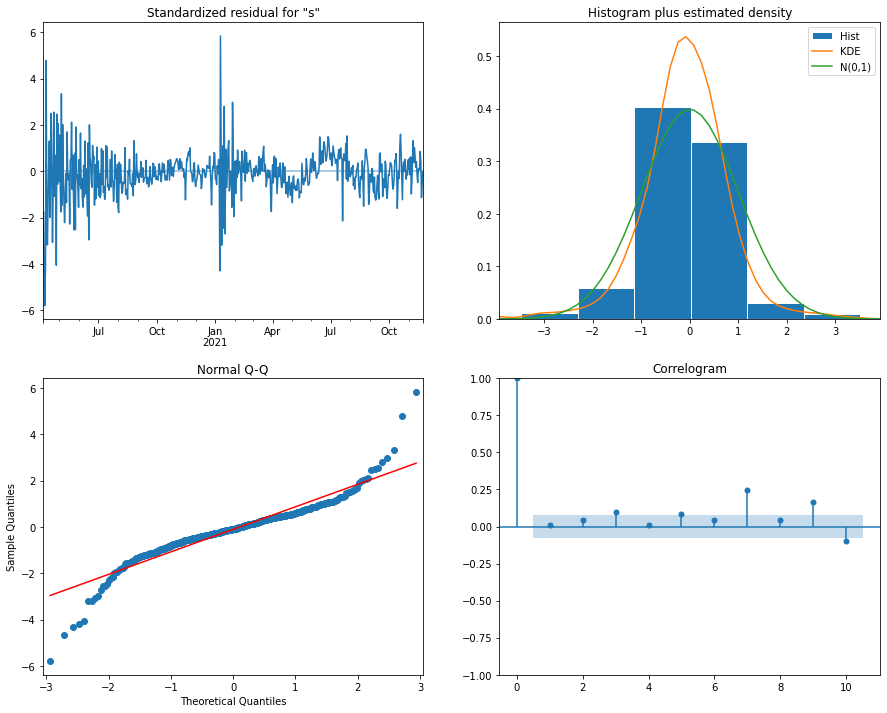

In [110]:
best_model4.plot_diagnostics(figsize=(15,12));

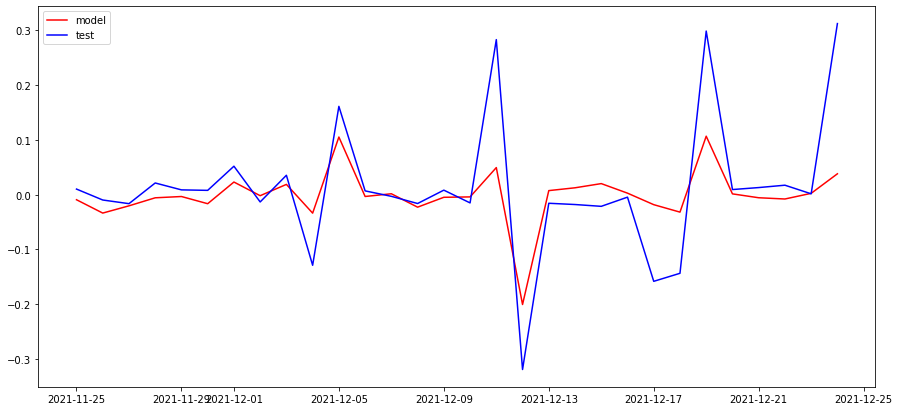

In [111]:
forecast = best_model4.predict(exog = exog_test,start = pd.to_datetime("2021-11-25"),end=pd.to_datetime("2021-12-24"))
plt.figure(figsize=(15,7))
plt.plot(forecast,color='r',label="model")
plt.plot(test,label="test",color='b')
plt.legend()
plt.show()

### with sentiment score 

In [1]:
import pandas as pd

In [116]:
temp = pd.read_csv("prev_ts_data.csv")
temp


,date,sscore
0,2021-11-01,0.60
1,2021-11-02,-0.80
2,2021-11-03,-0.80
3,2021-11-04,0.60
4,2021-11-05,-1.00
5,2021-11-06,-0.80
6,2021-11-07,-0.80
7,2021-11-08,-0.80
8,2021-11-09,-0.80
9,2021-11-10,-1.00


In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [ ]:
endog_train,endog_test = new_df['confirmed_sea_diff'].iloc[:-30],new_df['confirmed_sea_diff'].iloc[-30:]
exog_train,exog_test = new_df[['deaths_sea_diff','tests_sea_diff']].iloc[:-30],new_df[['deaths_sea_diff','tests_sea_diff']].iloc[-30:]

In [112]:
temp_df = new_df.copy()
temp_df

,tests,confirmed,deaths,tests_log,tests_log_diff,confirmed_log,confirmed_log_diff,deaths_log,deaths_log_diff,tests_sea_diff,confirmed_sea_diff,deaths_sea_diff
Day,,,,,,,,,,,,
2020-03-28,2195.0,93.85714,2.85714,7.693937,0.143276,4.541774,0.021539,1.049821,0.287680,0.143276,-0.320210,0.693157
2020-03-29,2492.0,89.71429,2.85714,7.820841,0.126904,4.496630,-0.045144,1.049821,0.000000,0.130465,-0.261245,-0.916312
2020-03-30,2445.0,107.42857,3.14286,7.801800,-0.019040,4.676826,0.180196,1.145133,0.095312,-0.284625,-0.114528,-0.374688
2020-03-31,2905.0,123.00000,3.57143,7.974189,0.172388,4.812184,0.135358,1.272966,0.127833,0.293683,0.099179,0.261367
2020-04-01,2776.0,191.57143,6.57143,7.928766,-0.045422,5.255261,0.443076,1.882731,0.609765,-0.327490,0.202821,0.358454
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-20,1205733.0,6931.42857,302.71429,14.002598,0.017634,8.843821,-0.009395,5.712789,0.099661,0.035367,0.009214,0.084531
2021-12-21,1209104.0,6836.14286,312.85714,14.005390,0.002792,8.829979,-0.013842,5.745747,0.032957,0.026542,0.012840,0.008849
2021-12-22,1215479.0,6767.71429,325.85714,14.010649,0.005259,8.819919,-0.010060,5.786459,0.040712,0.008703,0.017163,-0.040211


In [115]:
temp_df = temp_df.asfreq("D")
temp_df.index

DatetimeIndex(['2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31',
               '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
               '2020-04-05', '2020-04-06',
               ...
               '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-18',
               '2021-12-19', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-24'],
              dtype='datetime64[ns]', name='Day', length=637, freq='D')

In [117]:
temp.rename({"date":"Day"},axis=1,inplace=True)
temp

,Day,sscore
0,2021-11-01,0.60
1,2021-11-02,-0.80
2,2021-11-03,-0.80
3,2021-11-04,0.60
4,2021-11-05,-1.00
5,2021-11-06,-0.80
6,2021-11-07,-0.80
7,2021-11-08,-0.80
8,2021-11-09,-0.80
9,2021-11-10,-1.00


In [118]:
temp.set_index("Day",inplace=True)
temp.index

Index(['2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04', '2021-11-05',
       '2021-11-06', '2021-11-07', '2021-11-08', '2021-11-09', '2021-11-10',
       '2021-11-11', '2021-11-12', '2021-11-13', '2021-11-14', '2021-11-15',
       '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-20',
       '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
       '2021-11-26', '2021-11-27', '2021-11-28', '2021-11-29', '2021-11-30',
       '2021-12-01', '2021-12-02', '2021-12-03', '2021-12-04', '2021-12-05',
       '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09', '2021-12-10',
       '2021-12-11', '2021-12-12', '2021-12-13', '2021-12-14', '2021-12-15',
       '2021-12-16', '2021-12-17', '2021-12-18', '2021-12-19', '2021-12-20',
       '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
       '2021-12-26', '2021-12-27'],
      dtype='object', name='Day')

In [119]:
temp.index = pd.to_datetime(temp.index)
temp = temp.asfreq("D")

In [120]:
temp.index

DatetimeIndex(['2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04',
               '2021-11-05', '2021-11-06', '2021-11-07', '2021-11-08',
               '2021-11-09', '2021-11-10', '2021-11-11', '2021-11-12',
               '2021-11-13', '2021-11-14', '2021-11-15', '2021-11-16',
               '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-20',
               '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24',
               '2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
               '2021-12-03', '2021-12-04', '2021-12-05', '2021-12-06',
               '2021-12-07', '2021-12-08', '2021-12-09', '2021-12-10',
               '2021-12-11', '2021-12-12', '2021-12-13', '2021-12-14',
               '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-18',
               '2021-12-19', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-24', '2021-12-25', '2021-12-26',
      

In [121]:

df = pd.merge(temp_df,temp,how="outer",on=["Day"])

df = df.asfreq("D")

"""df.dropna(inplace=True)
df"""


'df.dropna(inplace=True)\ndf'

In [122]:
df

,tests,confirmed,deaths,tests_log,tests_log_diff,confirmed_log,confirmed_log_diff,deaths_log,deaths_log_diff,tests_sea_diff,confirmed_sea_diff,deaths_sea_diff,sscore
Day,,,,,,,,,,,,,
2020-03-28,2195.0,93.85714,2.85714,7.693937,0.143276,4.541774,0.021539,1.049821,0.287680,0.143276,-0.320210,0.693157,NaN
2020-03-29,2492.0,89.71429,2.85714,7.820841,0.126904,4.496630,-0.045144,1.049821,0.000000,0.130465,-0.261245,-0.916312,NaN
2020-03-30,2445.0,107.42857,3.14286,7.801800,-0.019040,4.676826,0.180196,1.145133,0.095312,-0.284625,-0.114528,-0.374688,NaN
2020-03-31,2905.0,123.00000,3.57143,7.974189,0.172388,4.812184,0.135358,1.272966,0.127833,0.293683,0.099179,0.261367,NaN
2020-04-01,2776.0,191.57143,6.57143,7.928766,-0.045422,5.255261,0.443076,1.882731,0.609765,-0.327490,0.202821,0.358454,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,1199452.0,6653.85714,323.42857,13.997375,-0.013273,8.802952,-0.016967,5.778978,-0.007481,-0.026614,0.001440,-0.017151,-0.8
2021-12-24,1186017.0,7680.85714,378.71429,13.986111,-0.011264,8.946486,0.143534,5.936782,0.157804,-0.007222,0.312461,0.337451,-1.0
2021-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0


In [123]:

df.dropna(inplace=True)

df


,tests,confirmed,deaths,tests_log,tests_log_diff,confirmed_log,confirmed_log_diff,deaths_log,deaths_log_diff,tests_sea_diff,confirmed_sea_diff,deaths_sea_diff,sscore
Day,,,,,,,,,,,,,
2021-11-01,1204511.0,13433.57143,544.57143,14.001584,-0.013783,9.505512,-0.021098,6.299999,0.023087,-0.014790,-0.015272,-0.053201,0.60
2021-11-02,1186971.0,13212.42857,505.42857,13.986915,-0.014669,9.488913,-0.016599,6.225407,-0.074592,-0.009058,-0.005670,-0.212990,-0.80
2021-11-03,1153050.0,12745.14286,466.57143,13.957921,-0.028994,9.452906,-0.036008,6.145411,-0.079996,-0.026975,-0.014226,-0.254682,-0.80
2021-11-04,1121195.0,12513.85714,383.14286,13.929906,-0.028016,9.434592,-0.018314,5.948408,-0.197003,-0.025571,-0.004438,-0.345905,0.60
2021-11-05,1018835.0,12030.42857,360.71429,13.834170,-0.095735,9.395194,-0.039397,5.888086,-0.060322,-0.102916,-0.019645,-0.031717,-1.00
2021-11-06,986162.0,11744.14286,372.14286,13.801576,-0.032594,9.371110,-0.024085,5.919278,0.031192,-0.011067,0.006873,0.060128,-0.80
2021-11-07,937976.0,11596.14286,374.28571,13.751480,-0.050096,9.358428,-0.012682,5.925019,0.005742,-0.040450,0.005805,0.056001,-0.80
2021-11-08,981522.0,11553.71429,358.42857,13.796860,0.045380,9.354762,-0.003666,5.881729,-0.043290,0.059163,0.017432,-0.066377,-0.80
2021-11-09,1001942.0,11491.28571,379.71429,13.817451,0.020591,9.349344,-0.005418,5.939419,0.057690,0.035260,0.011181,0.132282,-0.80


In [125]:

train,test = df["confirmed_sea_diff"][:-6],df["confirmed_sea_diff"][-6:]
exog_train,exog_test = df[["tests_sea_diff","deaths_sea_diff","sscore"]][:-6],df[["tests_sea_diff","deaths_sea_diff","sscore"]][-6:]


In [126]:

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


In [127]:

adfuller(train)


(-3.0327618014991042,
 0.031946076945212516,
 6,
 41,
 {'1%': -3.60098336718852,
  '5%': -2.9351348158036012,
  '10%': -2.6059629803688282},
 -94.69052369251875)

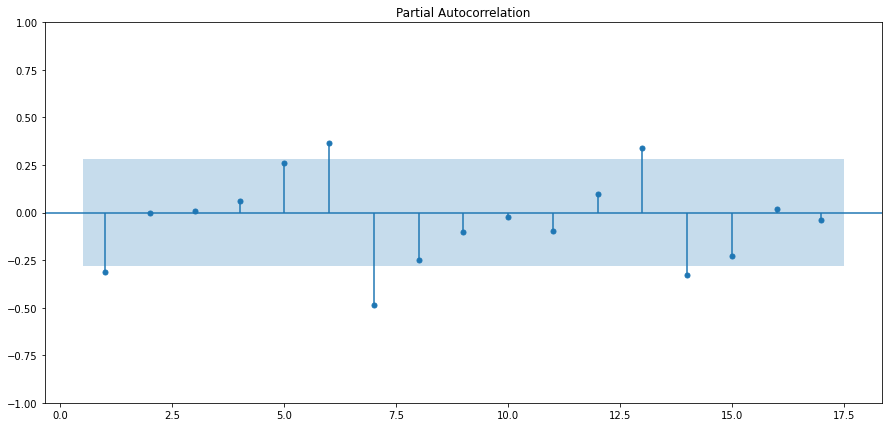

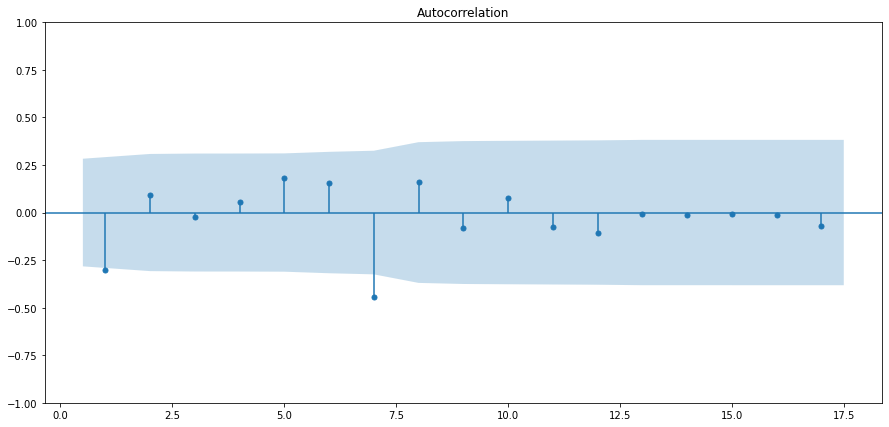

In [128]:

plot_pacf(train,zero=False);
plot_acf(train,zero=False);


In [129]:

from itertools import product

p = [0,1,2,3,4,5,6,7]
q = [0,1,2,3,4,5,6,7]
d=1
D=1
s=7
P = [0,1]
Q= [0,1]
param = product(p, q, P, Q)
param_list = list(param)
len(param_list)


256

In [130]:

from tqdm import tqdm_notebook



def optimize_SARIMA_mul(parameters_list, d, D, s, endog,exog=None):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(endog,exog=exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s),
                            enforce_stationarity=False,enforce_invertibility=False).fit()
            aic = model.aic
            results.append([param, aic])
        except:
            continue
    #print(results)
    result_df_mul = pd.DataFrame(results)
    result_df_mul.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df_mul = result_df_mul.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df_mul


In [131]:

df_res = optimize_SARIMA_mul(endog=train,exog=exog_train,parameters_list=param_list, d=1,D= 1,s= 7)

df_res


  0%|          | 0/256 [00:00<?, ?it/s]

,"(p,q)x(P,Q)",AIC
0,"(0, 1, 1, 0)",-74.461126
1,"(0, 1, 0, 1)",-74.286435
2,"(0, 1, 1, 1)",-74.110367
3,"(0, 2, 1, 0)",-73.875719
4,"(2, 0, 0, 1)",-73.705419
...,...,...
220,"(5, 5, 1, 1)",-46.348610
221,"(6, 6, 1, 0)",-45.771440
222,"(1, 6, 0, 1)",-45.214601
223,"(6, 3, 1, 1)",-43.232711


In [136]:

model = SARIMAX(endog=train,exog=exog_train,order=(0,1,1),seasonal_order=(1,1,1,7)).fit(disp=-1)
print(model.summary())


                                     SARIMAX Results                                     
Dep. Variable:                confirmed_sea_diff   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 7)   Log Likelihood                  57.002
Date:                           Thu, 30 Dec 2021   AIC                           -100.004
Time:                                   20:47:53   BIC                            -88.181
Sample:                               11-01-2021   HQIC                           -95.729
                                    - 12-18-2021                                         
Covariance Type:                             opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
tests_sea_diff      0.1337      0.338      0.396      0.692      -0.528       0.795
deaths_sea_diff     0.1958  

In [137]:

# Commented out IPython magic to ensure Python compatibility.
import matplotlib.pyplot as plt
# %matplotlib inline


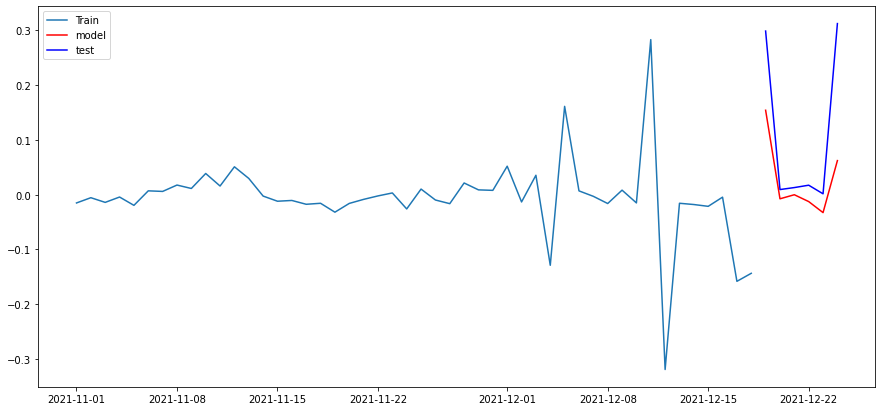

In [138]:

forecast = model.predict(exog = exog_test,start = "2021-12-19",end="2021-12-24")
plt.figure(figsize=(15,7))
plt.plot(train,label="Train")
plt.plot(forecast,color='r',label="model")
plt.plot(test,label="test",color='b')
plt.legend()
plt.show()



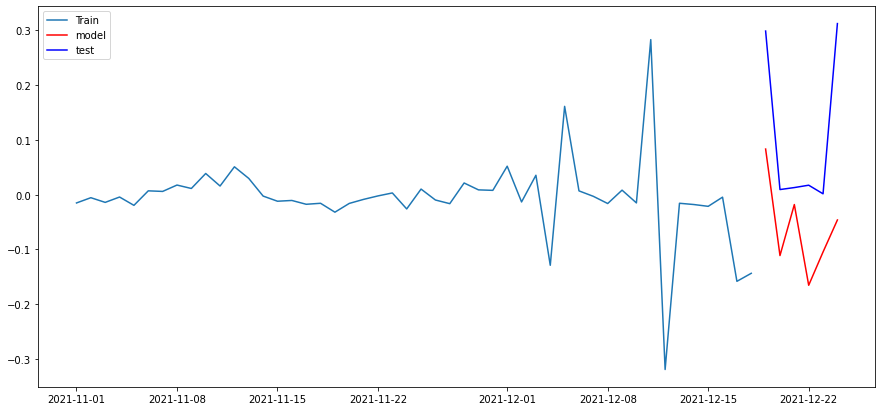

In [25]:

forecast = model.predict(exog = exog_test,start = "2021-12-19",end="2021-12-24")
plt.figure(figsize=(15,7))
plt.plot(train,label="Train")
plt.plot(t,color='r',label="model")
plt.plot(test,label="test",color='b')
plt.legend()
plt.show()

